In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
df = pd.read_csv('sim_results.csv', index_col=0)

In [6]:
df

,w_index,l_code,p_code,mean_demand,safety_stock,mape,rmse,service_level,cycle_rate,bullwhip_rate
0,0,1001,1000151924,128.96875,99.959977,51.454468,76.058724,0.635819,0.247261,2.966817
1,1,1001,1000039009,20.75000,21.915836,43.311005,11.623052,0.745918,0.400989,2.140621
2,2,1002,1000151924,125.03125,134.004617,31.094134,58.371783,0.803438,0.505392,1.834927
3,3,1001,1000151925,69.53125,67.577332,37.968652,37.679551,0.650642,0.457648,2.274440
4,4,1014,1000151924,102.93750,84.309495,48.702488,58.664971,0.608689,0.293402,3.680314
...,...,...,...,...,...,...,...,...,...,...
541,2664,2042,1000030686,3.53125,6.066523,100.946516,3.771388,0.636758,2.542157,1.659295
542,2696,1007,1000071547,2.21875,8.594620,146.072406,2.506275,1.000000,10.750389,1.299276
543,2729,1017,1000163025,2.71875,10.458411,185.687093,3.882260,1.000000,7.502722,1.313343
544,2730,2024,1000030687,2.50000,7.556411,106.561880,2.822019,0.840359,4.805666,1.337613


In [7]:
df['service_level'].mean()

0.8774797836988301

<AxesSubplot:>

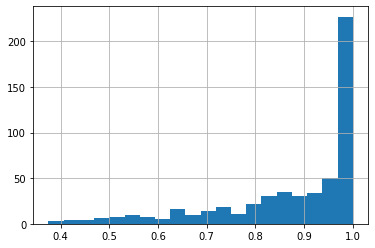

In [14]:
df['service_level'].hist(bins=20)

In [28]:
(df['service_level']>.95).mean()

0.4706959706959707

<AxesSubplot:>

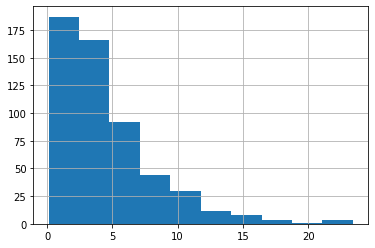

In [29]:
df['cycle_rate'].hist()

In [30]:
(df['cycle_rate']<=4).mean()

0.5787545787545788

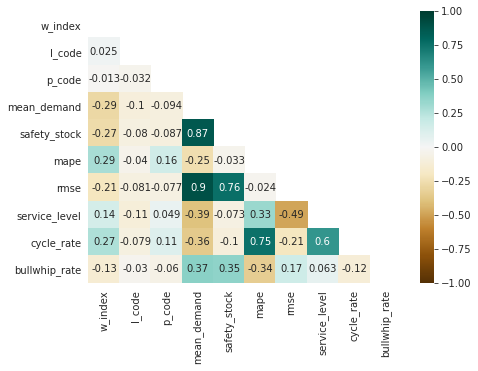

In [27]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [68]:
df2 = pd.read_csv('sim_results.csv', index_col=0)

In [82]:
(df2['service_level'] > .95).mean(), (df['service_level'] > .95).mean()

(0.4981684981684982, 0.4706959706959707)

<AxesSubplot:>

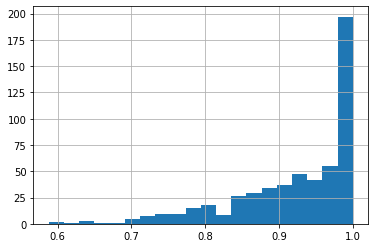

In [83]:
df2['service_level'].hist(bins=20)

<AxesSubplot:>

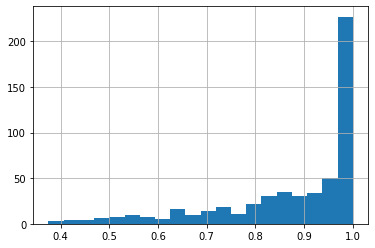

In [78]:
df['service_level'].hist(bins=20)

In [84]:
df3 = pd.read_csv('prediction/forecast_0_32.csv')

<AxesSubplot:>

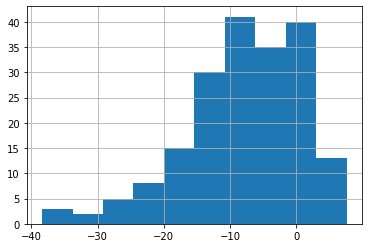

In [99]:
df3 = df3[(df3['location_code_1001']==1) & (df3['product_code_1000039009']==1)]
(df3['yhat']-df3['y']).hist()

In [15]:
dfx = pd.read_csv('prediction/forecast_0_32.csv')
dfp = pd.read_csv('prediction/forecast_0_32_p.csv')

In [6]:
np.mean(dfp['yhat'] - dfp['y']), np.mean(dfx['yhat'] - dfx['y'])

(0.22055598083624578, -0.4064075213972414)

In [9]:
simp = pd.read_csv('sim_results_p.csv')

In [46]:
simn = pd.read_csv('sim_results_nb.csv')

In [50]:
np.mean(sim_agg['service_level'] > .95)

0.7509157509157509

In [16]:
sim_agg = df[['w_index', 'l_code', 'p_code']]

In [ ]:
sim_agg['xg'] = df['service_level']
sim_agg['pr'] = simp['service_level']
sim_agg['nb'] = simn['service_level']

In [ ]:
sim_agg['service_level'] = sim_agg.apply(lambda x: max(x['xg'], x['pr'], x['nb']), axis=1)

In [ ]:
sim_agg['mean_demand'] = df['mean_demand']

In [55]:
for i in ['xg', 'nb', 'pr']:
    sim_agg['sl_%s' % i] = sim_agg.apply(lambda x: max([x['xg'], x['pr'], x['nb']]) == x[i], axis=1)

In [66]:
sim_dummy = pd.get_dummies(sim_agg, columns=['l_code', 'p_code']).corr()[['sl_xg', 'sl_pr', 'sl_nb']]

In [81]:
sim_dummy.drop(['xg', 'pr', 'nb'], inplace=True)

(array([[211.,  27.,  10.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [160.,  53.,  26.,  10.,   2.,   3.,   4.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
        [167.,  29.,  18.,  10.,   7.,   0.,   4.,   2.,   1.,   0.,   2.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]]),
 array([  1.625    ,   7.9921875,  14.359375 ,  20.7265625,  27.09375  ,
         33.4609375,  39.828125 ,  46.1953125,  52.5625   ,  58.9296875,
         65.296875 ,  71.6640625,  78.03125  ,  84.3984375,  90.765625 ,
         97.1328125, 103.5      , 109.8671875, 116.234375 , 122.6015625,
        128.96875  ]),
 <a list of 3 BarContainer objects>)

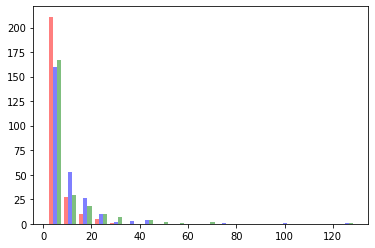

In [109]:
plt.hist([sim_agg[sim_agg['sl_xg']]['mean_demand'], sim_agg[sim_agg['sl_pr']]['mean_demand'], sim_agg[sim_agg['sl_nb']]['mean_demand']], color=['r', 'b', 'g'], alpha=.5, bins=20)

(array([[184.,  41.,  11.,   4.,   5.,   3.,   3.,   2.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [136.,  64.,  28.,  15.,   6.,   3.,   3.,   1.,   0.,   1.,   0.,
           0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.],
        [118.,  45.,  17.,  12.,  13.,   8.,   6.,   9.,   2.,   5.,   1.,
           2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   2.]]),
 array([ 0.9217353 ,  4.61168732,  8.30163935, 11.99159138, 15.6815434 ,
        19.37149543, 23.06144746, 26.75139948, 30.44135151, 34.13130353,
        37.82125556, 41.51120759, 45.20115961, 48.89111164, 52.58106367,
        56.27101569, 59.96096772, 63.65091974, 67.34087177, 71.0308238 ,
        74.72077582]),
 <a list of 3 BarContainer objects>)

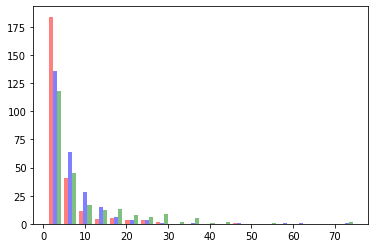

In [123]:
plt.hist([sim_agg[sim_agg['sl_xg']]['std'], sim_agg[sim_agg['sl_pr']]['std'], sim_agg[sim_agg['sl_nb']]['std']], color=['r', 'b', 'g'], alpha=.5, bins=20)

(array([[ 27., 170.,  46.,   7.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [ 36., 139.,  51.,  24.,   9.,   1.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.],
        [ 47., 151.,  35.,   7.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.41482048, 0.60414522, 0.79346996, 0.98279469, 1.17211943,
        1.36144417, 1.55076891, 1.74009365, 1.92941839, 2.11874313,
        2.30806787, 2.49739261, 2.68671735, 2.87604209, 3.06536682,
        3.25469156, 3.4440163 , 3.63334104, 3.82266578, 4.01199052,
        4.20131526]),
 <a list of 3 BarContainer objects>)

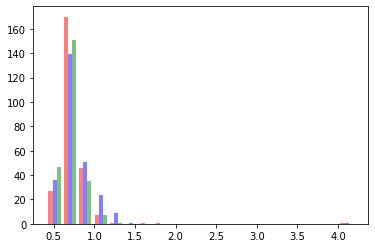

In [124]:
plt.hist([sim_agg[sim_agg['sl_xg']]['std_mean'], sim_agg[sim_agg['sl_pr']]['std_mean'], sim_agg[sim_agg['sl_nb']]['std_mean']], color=['r', 'b', 'g'], alpha=.5, bins=20)

In [170]:
fxg = pd.read_csv('prediction/forecast_32_32.csv')
fpr = pd.read_csv('prediction/forecast_32_32_p.csv')
fnb = pd.read_csv('prediction/forecast_32_32_nb.csv')
for x in sim_agg.index:
    l = sim_agg.loc[x, 'l_code']
    p = sim_agg.loc[x, 'p_code']

    new_df = fxg[(fxg['location_code']==l) & (fxg['product_code']==p)].iloc[-32:, :]
    rmse = np.sqrt(np.mean((new_df['y'] - new_df['yhat'])**2))
    sim_agg.loc[x, 'rmse_xg'] = rmse
    error = np.mean(new_df['yhat'] - new_df['y'])
    sim_agg.loc[x, 'error_xg'] = error
    
    new_df = fpr[(fpr['location_code']==l) & (fpr['product_code']==p)].iloc[-32:, :]
    rmse = np.sqrt(np.mean((new_df['y'] - new_df['yhat'])**2))
    sim_agg.loc[x, 'rmse_pr'] = rmse
    error = np.mean(new_df['yhat'] - new_df['y'])
    sim_agg.loc[x, 'error_pr'] = error
    
    new_df = fnb[(fnb['location_code']==l) & (fnb['product_code']==p)].iloc[-32:, :]
    rmse = np.sqrt(np.mean((new_df['y'] - new_df['yhat'])**2))
    sim_agg.loc[x, 'rmse_nb'] = rmse
    error = np.mean(new_df['yhat'] - new_df['y'])
    sim_agg.loc[x, 'error_nb'] = error

In [128]:
np.mean(sim_agg['xg']>.95), np.mean(sim_agg['pr']>.95), np.mean(sim_agg['nb']>.95)

(0.4706959706959707, 0.4652014652014652, 0.510989010989011)

In [132]:
np.mean(sim_agg['service_level']>.95)

0.7509157509157509

(array([[  0.,   3.,   2.,   5.,   7.,  17.,  13.,  33.,  44., 422.],
        [  7.,  10.,  18.,  12.,  26.,  32.,  33.,  66.,  65., 277.]]),
 array([0.37493382, 0.43744043, 0.49994705, 0.56245367, 0.62496029,
        0.68746691, 0.74997353, 0.81248014, 0.87498676, 0.93749338,
        1.        ]),
 <a list of 2 BarContainer objects>)

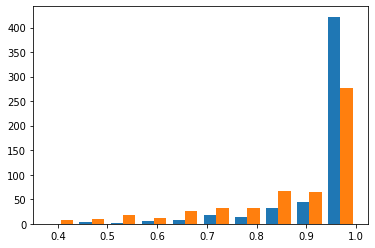

In [141]:
plt.hist([sim_agg['service_level'], df['service_level']])

In [200]:
fs = ['xg', 'pr', 'nb']
for i in fs:
    sim_agg['service_rmse'] = sim_agg.apply(lambda x: x[fs[np.argmin([x['rmse_xg'], x['rmse_pr'], x['rmse_nb']])]], axis=1)

In [ ]:
np.mean(sim_agg['cycle_rate'] > .95)

In [186]:
sim2 = pd.read_csv('sim_results_2.csv')

(array([[  7.,  10.,  18.,  12.,  26.,  32.,  33.,  66.,  65., 277.],
        [  0.,   1.,   5.,   6.,  12.,  26.,  48.,  76., 121., 251.]]),
 array([0.37493382, 0.43744043, 0.49994705, 0.56245367, 0.62496029,
        0.68746691, 0.74997353, 0.81248014, 0.87498676, 0.93749338,
        1.        ]),
 <a list of 2 BarContainer objects>)

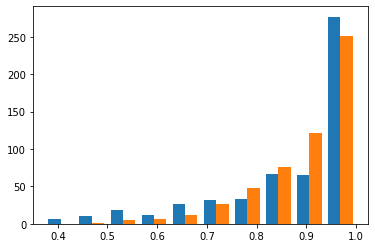

In [191]:
plt.hist([df['service_level'], sim2['service_level']])

In [193]:
df['service_level'].std(), sim2['service_level'].std()

(0.15062946692837742, 0.10323966814557863)

In [195]:
df['service_level'].mean(), sim2['service_level'].mean()

(0.8774797836988301, 0.8981274666466221)

In [196]:
np.mean(df['service_level'] > .95), np.mean(sim2['service_level'] > .95)

(0.4706959706959707, 0.3901098901098901)

In [199]:
np.mean(df['service_level'] > .9), np.mean(sim2['service_level'] > .9)

(0.5842490842490843, 0.5970695970695971)

In [2]:
sim4 = pd.read_csv('sim_results_4.csv')

In [3]:
sim4['service_level'].mean()

0.9372006645277703

<AxesSubplot:>

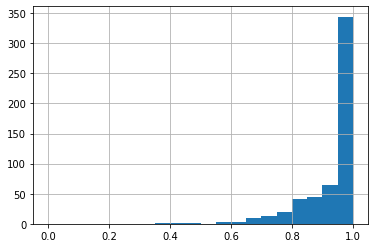

In [17]:
sim4['service_level'].hist(bins=list(np.arange(0,1.01,.05)))

In [18]:
list(np.arange(0,1.01,.05))

[0.0,
 0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8,
 0.8500000000000001,
 0.9,
 0.9500000000000001,
 1.0]

In [24]:
def get_avg_price(x):
    l = x['l_code']
    p = x['p_code']
    return dfx[(dfx['location_code']==l) & (dfx['product_code']==p)]['avg_sales_price'].values[-32:].mean()

sim4['price'] = sim4.apply(get_avg_price, axis=1)

In [42]:
np.sum(sim4['cycle_rate'] * sim4['price'] * sim4['mean_demand']) / (sim4['mean_demand'].sum())

146.64188169944822

In [40]:
np.sum(sim4['cycle_rate'] * sim4['mean_demand']) / (sim4['mean_demand'].sum())

4.469584541871624

In [45]:
np.sum(sim4['cycle_rate'] * sim4['price'] * sim4['mean_demand']) / np.sum(sim4['mean_demand'] * sim4['price'])

4.735997661752361

In [54]:
metrics = ['service_level', 'cycle_rate', 'bullwhip_rate']

for i in metrics:
    result = np.sum(sim4[i] * sim4['price'] * sim4['mean_demand']) / np.sum(sim4['mean_demand'] * sim4['price'])
    print('%s: %.2f' % (i, result))

service_level: 0.91
cycle_rate: 4.74
bullwhip_rate: 1.55


In [55]:
np.sum(sim4['safety_stock']/sim4['mean_demand'] * sim4['price'] * sim4['mean_demand']) / np.sum(sim4['mean_demand'] * sim4['price'])

1.8966903485723285